# Regression Style Classification with Images

### Import Required Packages

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

### Read in the Data

In [3]:
labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(labels)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

### Display Data Examples

In [4]:
y_train_df = pd.DataFrame(y_train)
y_train_df.reset_index(inplace = True, drop = False)
y_train_df.columns = ['index', 'label']

## Extract first example for each category
examples = y_train_df.groupby('label').first()
examples.reset_index(inplace = True, drop = False)

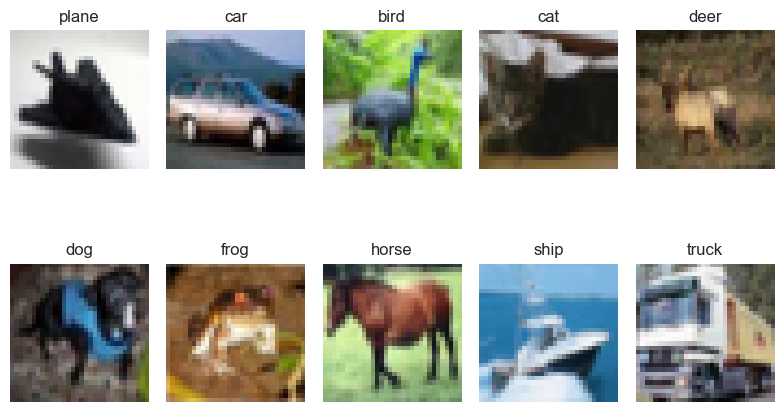

In [5]:
#Display the example images in a grid
fig, ax = plt.subplots(2, 5)
for i in range(examples.shape[0]):
    if (i - 5) < 0:
        y = 0
    else:
        y = 1
    x = i % 5

    ax[y, x].imshow(x_train[examples['index'][i], :, :, :])
    ax[y, x].set_title(labels[i])
    ax[y, x].axis('off')
fig.tight_layout()

### Normalize and Reshape the Data

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], 32 * 32 * 3))
x_train = pd.DataFrame(x_train.astype('float32') / 255)
x_test = np.reshape(x_test, (x_test.shape[0], 32 * 32 * 3))
x_test = pd.DataFrame(x_test.astype('float32') / 255)

# Convert labels from integers to specific label text
y_train = pd.DataFrame(y_train)
y_train['label'] = ''
for i in range(y_train.shape[0]):
    y_train['label'][i] = labels[y_train.iloc[i,0]]
y_test = pd.DataFrame(y_test)
y_test['label'] = ''
for i in range(y_test.shape[0]):
    y_test['label'][i] = labels[y_test.iloc[i,0]]

# Add response column to predictor matrix
x_train['label'] = y_train['label']
x_test['label'] = y_test['label']

### Train Models with PyCaret
##### PyCaret is a package that allows for easyfitting of multiple models

In [7]:
# Specify training parameters
s = setup(data=x_train, # training data
          target='label', # label column in training data
          test_data=x_test, # test data
          index=False,
          ordinal_features=None, # specify feature type if desired
          numeric_features=None, # specify feature type if desired
          categorical_features=None, # specify feature type if desired
          preprocess=True,
          max_encoding_ohe=25, # default. one-hot-encoding
          polynomial_features=False, # create x1^2, x1*x2, ...
          polynomial_degree=2,
          normalize=True,
          normalize_method='zscore',
          pca=False, # Principal component preprocessing
          pca_method='linear',
          use_gpu=True, # False if GPU is not available
          session_id=13)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,13
1,Target,label
2,Target type,Multiclass
3,Target mapping,"bird: 0, car: 1, cat: 2, deer: 3, dog: 4, frog: 5, horse: 6, plane: 7, ship: 8, truck: 9"
4,Original data shape,"(60000, 3073)"
5,Transformed data shape,"(60000, 3073)"
6,Transformed train set shape,"(50000, 3073)"
7,Transformed test set shape,"(10000, 3073)"
8,Numeric features,3072
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [8]:
# View available models
models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### The following cell is slow; it is fitting multiple models with repeated k-fold validation

In [ ]:
# Specify k-fold cross-validation and run the desired models from the above list
rkf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=13)

best = compare_models(include = ['lr', 'knn', 'nb', 'dt', 'svm', 'mlp', 'ridge', 'rf'],
                      fold=rkf,
                      cross_validation=False,
                      sort='Accuracy',
                      n_select=3)

In [ ]:
# Display confusion matrix for the best model
preds = predict_model(best[0], x_test)
CM_test = confusion_matrix(y_test['label'], preds['prediction_label'])
fig = sns.heatmap(CM_test, annot = True, fmt = 'g')
fig.set(xlabel='Prediction', ylabel='Truth', xticklabels=labels, title = 'Test Confusion Matrix')
fig.set_yticklabels(labels, va='center')
plt.show()

# Convolutional Neural Network Classification with Images

### Load Additional Packages

In [10]:
from tensorflow.keras.utils import to_categorical

### Read in the Data, Normalize, Restructure

In [11]:
labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(labels)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train / 255
x_test = x_test / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Train a Basic CNN

In [13]:
# Model Definition: 2 convolutional layers with max pooling followed by 2 dense layers with dropout
# The first to lines can be removed if not training on mulitple GPUs
mirrored_strategy = tf.distribute.MirroredStrategy(cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
with mirrored_strategy.scope():
    parallel_model = tf.keras.models.Sequential()
    parallel_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
    parallel_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    parallel_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
    parallel_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    parallel_model.add(tf.keras.layers.Flatten())
    parallel_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    parallel_model.add(tf.keras.layers.Dropout(0.3))
    parallel_model.add(tf.keras.layers.Dense(len(labels), activation = 'softmax'))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [14]:
# Define the optimzer, loss, and metric to track during training
parallel_model.compile(optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.0001),
                       loss = 'categorical_crossentropy',
                       metrics = ['acc'])

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


In [16]:
# Train the model
history = parallel_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 24s 16ms/step - loss: 2.0367 - acc: 0.2610
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.7685 - acc: 0.3649
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.6513 - acc: 0.4107
Epoch 4/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5725 - acc: 0.4369
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.5130 - acc: 0.4600
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4669 - acc: 0.4766
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4281 - acc: 0.4913
Epoch 8/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3981 - acc: 0.5028
Epoch 9/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3673 - acc: 0.5152
Epoch 10/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3411 - acc: 0.5250


In [17]:
# Evaluate performance on test data
metrics = parallel_model.evaluate(x_test,  y_test, verbose=2)
loss, accuracy = metrics[0], metrics[1]

313/313 - 4s - loss: 1.2837 - acc: 0.5523 - 4s/epoch - 12ms/step


[Text(0, 0.5, 'plane'),
 Text(0, 1.5, 'car'),
 Text(0, 2.5, 'bird'),
 Text(0, 3.5, 'cat'),
 Text(0, 4.5, 'deer'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'frog'),
 Text(0, 7.5, 'horse'),
 Text(0, 8.5, 'ship'),
 Text(0, 9.5, 'truck')]

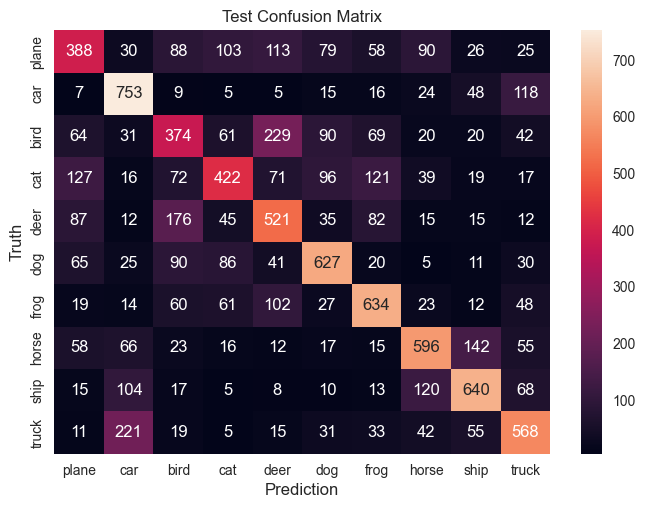

In [18]:
# Generate confusion matrix on test data
preds = pd.DataFrame(parallel_model.predict(x_test))
preds = pd.DataFrame(preds.idxmax(axis=1))
preds.columns = ['index']
preds['label'] = preds['index'].apply(lambda x: labels[x])
y_test = pd.DataFrame(pd.DataFrame(y_test).idxmax(axis = 1))
y_test.columns = ['index']
y_test['label'] = y_test['index'].apply(lambda x: labels[x])


fig = sns.heatmap(confusion_matrix(y_true = y_test['label'], y_pred = preds['label']), annot = True, fmt = 'g')
fig.set(xlabel = 'Prediction', ylabel = 'Truth', xticklabels = labels, title = 'Test Confusion Matrix')
fig.set_yticklabels(labels, va = 'center')

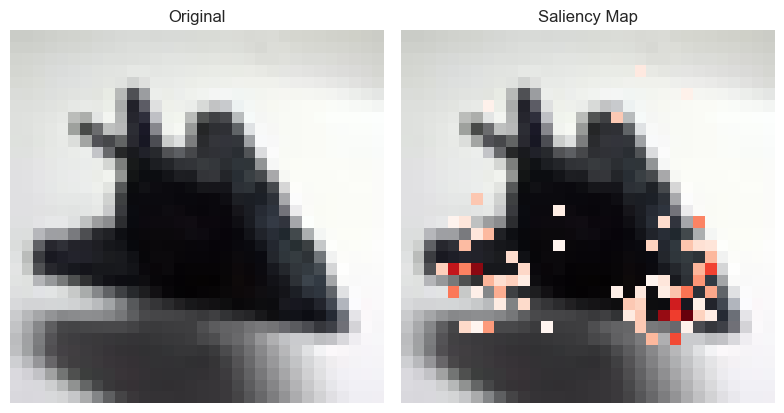

In [19]:
# Saliency mapping
img1 = x_train[examples['index'][0], :, :, :]
img = np.expand_dims(img1, axis=0)
y_pred = parallel_model.predict(img)
images = tf.Variable(img, dtype=float)

with tf.GradientTape() as tape:
    pred = parallel_model(images, training=False)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]

grads = tape.gradient(loss, images)

dgrad_abs = tf.math.abs(grads)
dgrad_max_ = np.max(dgrad_abs, axis=3)[0]
# normalize to range between 0 and 1
arr_min, arr_max = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)
grad_eval[grad_eval < np.percentile(0.4, grad_eval)] = np.nan

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
ax[0].set_title('Original')
ax[0].imshow(img1)
ax[0].axis('off')
ax[1].set_title('Saliency Map')
ax[1].imshow(img1)
ax[1].imshow(grad_eval, cmap='Reds')
ax[1].axis('off')
plt.tight_layout()